<a href="https://colab.research.google.com/github/olnsnly/repository/blob/main/HW4_%EC%A0%95%EC%9D%80%EC%84%A0(resnet18_pretrained).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as utils

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [ ]:
path_train = '/content/drive/MyDrive/인공지능 실습7/rsna2018/train'
path_valid = '/content/drive/MyDrive/인공지능 실습7/rsna2018/valid'

## 영상데이터에 대한 전처리과정 정의하기

In [ ]:
train_transforms = transforms.Compose(
      [
          transforms.Grayscale(num_output_channels=1),
          transforms.Resize((64,64)),
          transforms.ToTensor(),
      ]
    )

## ImageFolder를 활용하여 data loader를 생성하기

In [ ]:
batch_size = 32

trainset = torchvision.datasets.ImageFolder(root = path_train,transform=train_transforms)
validset = torchvision.datasets.ImageFolder(root = path_valid,transform=train_transforms)

trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
validloader = torch.utils.data.DataLoader(validset,batch_size=batch_size,shuffle=False)

In [ ]:
tgtnames = trainset.classes
print(tgtnames)

['normal', 'opacity']


In [ ]:
print(len(trainset),len(validset))

800 200


torch.Size([32, 1, 64, 64])
torch.Size([32])


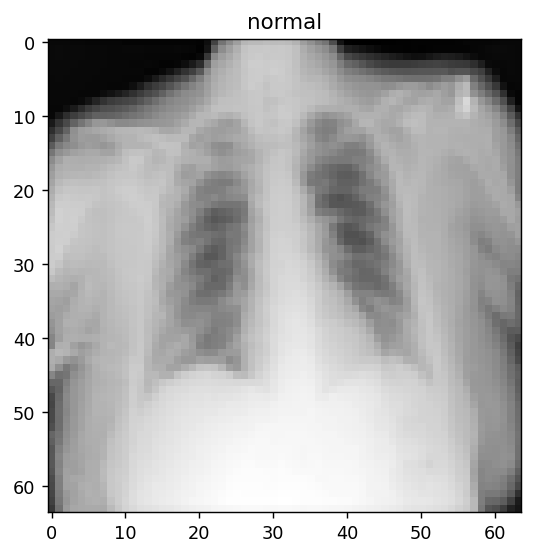

In [ ]:
for X, y in trainloader:
  print(X.shape)
  print(y.shape)
  I = X[0][0].numpy()
  plt.figure(dpi=128)
  plt.imshow(I,cmap='gray')
  plt.title(tgtnames[y[0]])
  plt.show()
  break

## CNN model을 정의해보기

In [ ]:
# load resnet18 with the pre-trained weights
from torchvision import models
import torch

resnet18_pretrained = models.resnet18(pretrained=True)

print(resnet18_pretrained)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
resnet18_pretrained.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet18_pretrained.fc = nn.Linear(in_features=512, out_features=2, bias=True)

In [ ]:
device = torch.device('cuda:0')
resnet18_pretrained.to(device) 

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

torch.Size([64, 1, 7, 7])


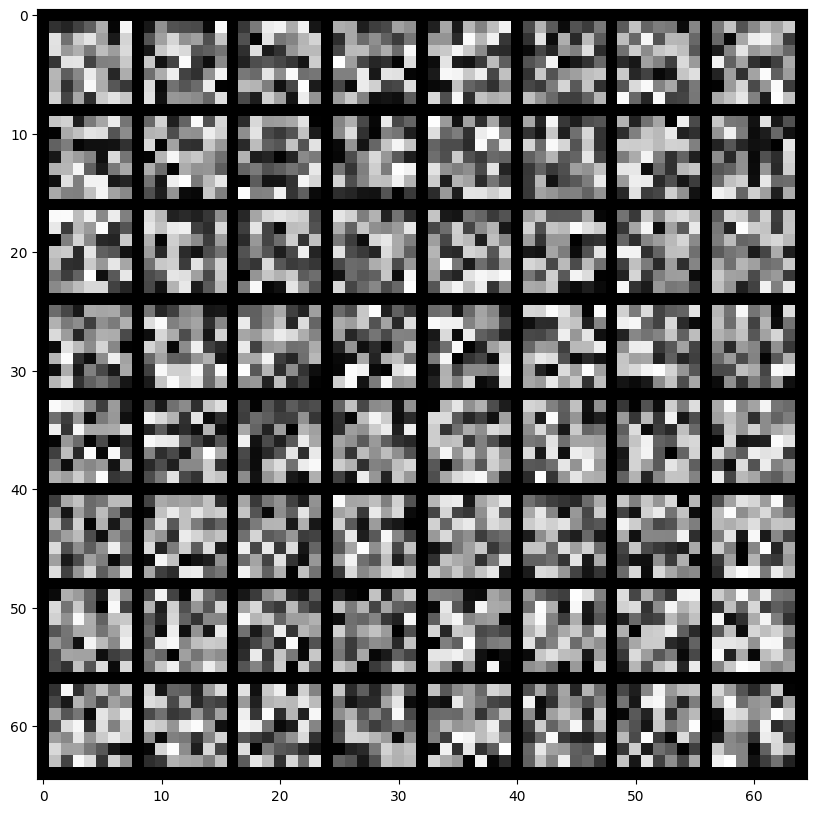

In [ ]:
# visualize the filters of the first CNN layer
for w in resnet18_pretrained.parameters():
    w = w.data.cpu()
    print(w.shape)
    break


# normalize weights
min_w = torch.min(w)
w1 = (-1/(2 * min_w)) * w + 0.5

# make grid to display it
grid_size = len(w1)
x_grid = [w1[i] for i in range(grid_size)]
x_grid = utils.make_grid(x_grid, nrow=8, padding=1)

plt.figure(figsize=(10, 10))
plt.imshow(x_grid.permute(1,2,0))

## Hyperparameter의 설정

In [ ]:
# setting hyper-parameters
learning_rate = .1
num_epochs = 50

# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(resnet18_pretrained.parameters(),lr=learning_rate) # sgd

## Model 학습 진행

In [ ]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_valid = np.array([])

for epoch in range(num_epochs):
    i=0
    l_epoch = 0
    correct = 0
    resnet18_pretrained.train()
    for X,y in trainloader:
        i=i+1
        X,y = X.to(device),y.to(device)
        y_hat=resnet18_pretrained(X)
        correct += (y_hat.argmax(dim=1)==y).sum()
        l=loss(y_hat,y)
        l_epoch+=l
        alg.zero_grad()
        l.backward()
        alg.step()

    loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/i)
    accs_train = np.append(accs_train,correct.cpu()/len(trainset))

    correct = 0
    resnet18_pretrained.eval()
    for X,y in validloader:
        X,y = X.to(device),y.to(device)
        y_hat = resnet18_pretrained(X)
        correct += (y_hat.argmax(dim=1)==y).sum()

    accs_valid = np.append(accs_valid,correct.cpu()/len(validset))

    plt.figure(2,dpi=80)
    plt.subplot(121)
    plt.plot(loss_train,label='train loss')
    plt.legend(loc='upper right')
    plt.subplot(122)
    plt.plot(accs_train,label='train accuracy')
    plt.plot(accs_valid,label='valid accuracy')
    plt.legend(loc='upper left')
    plt.title('epoch: %d '%(epoch))
    plt.savefig('loss_curve.png')
#        plt.show()
    plt.close(2)

    if epoch%5 == 0:
        print('epoch: %d '%(epoch))
        print('train loss: ',loss_train[-1])
        print('train accuracy: ',accs_train[-1])
        print('valid accuracy: ',accs_valid[-1])

epoch: 0 
train loss:  5.198929443359375
train accuracy:  0.5299999713897705
valid accuracy:  0.5550000071525574
epoch: 5 
train loss:  0.80542724609375
train accuracy:  0.7412499785423279
valid accuracy:  0.5049999952316284
epoch: 10 
train loss:  0.48939014434814454
train accuracy:  0.8212500214576721
valid accuracy:  0.8650000095367432
epoch: 15 
train loss:  0.4651954650878906
train accuracy:  0.8337500095367432
valid accuracy:  0.7699999809265137
epoch: 20 
train loss:  0.22990079879760741
train accuracy:  0.8924999833106995
valid accuracy:  0.8849999904632568
epoch: 25 
train loss:  0.17428428649902344
train accuracy:  0.9350000023841858
valid accuracy:  0.8949999809265137
epoch: 30 
train loss:  0.10678805351257324
train accuracy:  0.9487500190734863
valid accuracy:  0.9300000071525574
epoch: 35 
train loss:  0.11308781623840332
train accuracy:  0.9524999856948853
valid accuracy:  0.9700000286102295
epoch: 40 
train loss:  0.09878410339355469
train accuracy:  0.9599999785423279


## 학습과정의 요약

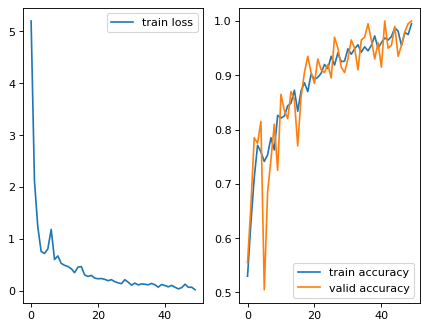

In [ ]:
plt.figure(2,dpi=80)
plt.subplot(121)
plt.plot(loss_train,label='train loss')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(accs_train,label='train accuracy')
plt.plot(accs_valid,label='valid accuracy')
plt.legend(loc='lower right')
plt.show()
     

## Validation set에 대한 개별결과 확인 (Inference)

In [ ]:
from PIL import Image

In [ ]:
N = 42
#validset.imgs[N][0]

normal


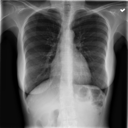

In [ ]:
I = Image.open(validset.imgs[N][0])
X = train_transforms(I)
y = validset.targets[N]

print(tgtnames[y])
I


In [ ]:
y_hat = resnet18_pretrained(X.unsqueeze(1).to(device))
print(y_hat.cpu().detach().numpy())
y_hat = y_hat.argmax(dim=1)
print(f'prediction of resnet18_pretrained: {tgtnames[y_hat.cpu().numpy()[0]]}')

[[ 7.0374103 -6.77081  ]]
prediction of resnet18_pretrained: normal


## Validation set에 대한 결과 요약하기

In [ ]:
y_list = np.array([])
y_hat_list = np.array([])
for X,y in validloader:
  y_hat = resnet18_pretrained(X.to(device))    
  y_hat = y_hat.argmax(dim=1)
  y_list = np.append(y_list,y)
  y_hat_list = np.append(y_hat_list,y_hat.cpu().numpy())

In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)

In [ ]:
print(classification_report(
    y_list,
    y_hat_list,
    target_names=tgtnames))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       100
     opacity       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



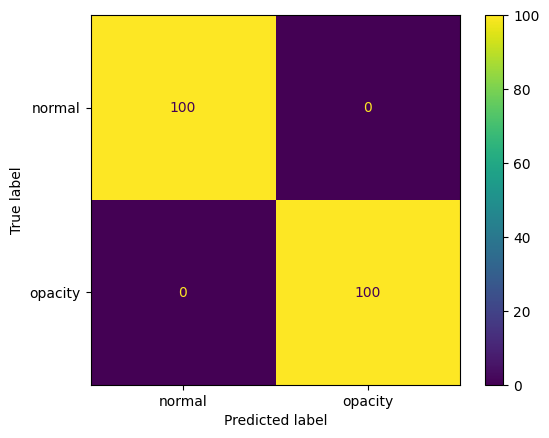

In [ ]:
cm = confusion_matrix(
    y_list,
    y_hat_list,
#    normalize='true',
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=tgtnames,
)
disp.plot(ax=plt.subplots(1, 1, facecolor='white')[1])
     